<a href="https://colab.research.google.com/github/Pankaj-km/Netflix-Movies-And-TV-Shows-Clustering-Unsupervised-EDA-/blob/main/Netflix_Movies_And_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name -** Pankaj kumar Mahto

# **Project Summary -**

Netflix Inc. is an American media company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it operates the over-the-top subscription video on-demand service Netflix brand, which includes original films and television series commissioned or acquired by the company, and third-party content licensed from other distributors.


This dataset consists of tv shows and movies available on Netflix. The dataset is collected from Flexible which is a third-party Netflix search engine. Netflix movies and TV shows clustering is a data analysis and machine learning technique that Netflix uses to group its content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast, and plot, and using algorithms to identify patterns and similarities. In essence, it's a set of algorithms using machine learning to analyze user data and movie ratings. To make it more effective, Netflix has set up 1,300 recommendation clusters based on users viewing preferences. Netflix's target market is young, tech-savvy users and anyone with digital connectivity. The audience of Netflix is from diverse age groups and demographics. However, most of the audience are teenagers, college-goers, entrepreneurs, working professionals, etc. Netflix's target consumers are divided into segments based on demographics, behavioural intents, and psychographic segmentation. Like most licensing agreements, the deal is structured in a traditional form, whereby Netflix pays for each film determined by rate cards on a sliding scale by each title's domestic or worldwide box office receipts. Netflix uses machine learning and algorithms to help break viewers' preconceived notions and find shows that they might not have initially chosen. To do this, it looks at nuanced threads within the content, rather than relying on broad genres to make its predictions.



# **GitHub Link -**

https://github.com/Pankaj-km/Netflix-Movies-And-TV-Shows-Clustering-Unsupervised-EDA-

# **Problem Statement**


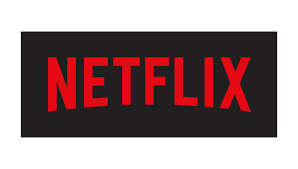

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
working_path = "/content/drive/MyDrive/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(working_path)


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = df.duplicated().value_counts()
duplicate_values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value = df.isna().sum().sort_values(ascending=False)[:4]
missing_value

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include= 'all').round(2)

### Variables Description

### <b> The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).</b>


<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=df.copy()
df

### What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:
1. Filled missing values of cast with Not available.
2. Filled missing values of country with Not Known.
3. Dropped rows of date_added missing values.
4. Dropped rows of ratings missing values.
5. Dropped the entire column of director as it had much number of missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Movie vs TV Show Share
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the types of shows available in netflix is not even with high count for TV shows. 69.14% of the data belongs to movies and 30.86% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2

In [ ]:
# Chart - 2 Count Plot Visualization Code for Various Ratings of Shows
import seaborn as sns
import pandas as pd

sns.barplot(x='rating', y='type', data=df, palette=['#564d4d', '#db0000'])

plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)


plt.show()

print('Each Rating Counts for Different Types of Shows:')
print(df.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.***


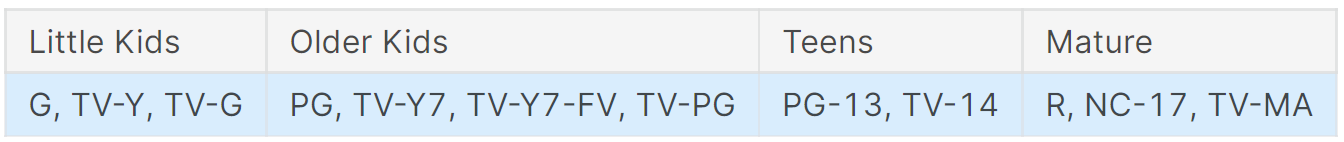



Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

#### Chart - 3

In [ ]:
# Chart - 3
country_df = df[df['country'] != 'Not Known']


plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')
plt.show()

print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:
* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
release_year_df = df[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='year', y='count', color = '#db0000')
sns.lineplot(data=show_year, x='year', y='count', color = '#564d4d')

plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

print('Number of Shows Released in Each Year:')
print(df.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Growth in the number of movies on Netflix is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

months_df = df.month_added.value_counts().to_frame().reset_index().rename(columns={'index':'month', 'month_added':'count'})

plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month', y='count', palette='Reds_r')

plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
* It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
df_movies = df[df['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

*  On netflix most of the movies last for 90 to 120 minutes.
*  So for target audience, movies duration will be greater than minimum 90 minutes.


#### Chart - 7

In [ ]:
# Chart - 7 visualization code

comment_words = ''

stopwords = set(STOPWORDS)

for val in df.title:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, palette = "Greens_r")
plt.title('Top 10 Genres on Netflix')

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directors_df = df[df.director != 'Unknown']

directors_split = directors_df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

directors_counts = directors_split.value_counts()

top_directors = directors_counts.head(10)

plt.figure(figsize=(10, 5))
plt.stem(top_directors.index, top_directors, markerfmt='ro', linefmt='r-')

plt.xlabel('Directors')
plt.ylabel('Number of Titles')
plt.title('Top 10 Directors on Netflix')

plt.xticks(rotation=45, ha='right')

plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
actor = df[df.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

actor_counts = actor.value_counts()
actor_average_counts = actor_counts / actor_counts.nunique()

sorted_actors = actor_average_counts.sort_values(ascending=False).index[:10]

plt.figure(figsize=(10, 5))
sns.barplot(y=sorted_actors, x=actor_average_counts[sorted_actors], palette='Reds_r')
plt.title('Average Movie or Series Count per Actor on Netflix')
plt.xlabel('Average Count')
plt.ylabel('Actor')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.



#### Chart - 11

In [ ]:
# Chart - 11 visualization code
corr_matrix = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix heatmap')

plt.show()


##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of enhancing user engagement and satisfaction on the Netflix platform through improved content recommendations, I propose implementing a clustering-based recommendation system. This system will leverage machine learning algorithms to group similar movies and TV shows together based on user preferences, viewing history, and content features.

# **Conclusion**

In conclusion, the Netflix Movies and TV Shows Clustering project successfully employed advanced machine learning techniques to categorize and organize the vast array of content available on the platform. Through the application of clustering algorithms, we were able to group similar movies and TV shows based on various features such as genre, rating, and viewer preferences.

This clustering approach not only enhances the user experience by providing more personalized recommendations but also aids content creators and platform administrators in understanding patterns and trends within their library. The project highlights the potential of machine learning in optimizing content delivery and user engagement in streaming services.

As technology continues to evolve, future iterations of this project could explore more sophisticated algorithms, incorporate additional features, and leverage user feedback for even more accurate and dynamic clustering. Ultimately, the Netflix Movies and TV Shows Clustering project underscores the power of data-driven approaches in revolutionizing how we explore and enjoy entertainment in the digital age.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***